In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bot-iot/data_26.csv
/kaggle/input/bot-iot/data_33.csv
/kaggle/input/bot-iot/data_49.csv
/kaggle/input/bot-iot/data_44.csv
/kaggle/input/bot-iot/data_38.csv
/kaggle/input/bot-iot/data_22.csv
/kaggle/input/bot-iot/data_30.csv
/kaggle/input/bot-iot/data_57.csv
/kaggle/input/bot-iot/data_46.csv
/kaggle/input/bot-iot/data_58.csv
/kaggle/input/bot-iot/data_21.csv
/kaggle/input/bot-iot/data_59.csv
/kaggle/input/bot-iot/data_32.csv
/kaggle/input/bot-iot/data_69.csv
/kaggle/input/bot-iot/data_19.csv
/kaggle/input/bot-iot/data_47.csv
/kaggle/input/bot-iot/data_14.csv
/kaggle/input/bot-iot/data_9.csv
/kaggle/input/bot-iot/data_52.csv
/kaggle/input/bot-iot/data_18.csv
/kaggle/input/bot-iot/data_53.csv
/kaggle/input/bot-iot/data_73.csv
/kaggle/input/bot-iot/data_63.csv
/kaggle/input/bot-iot/data_70.csv
/kaggle/input/bot-iot/data_17.csv
/kaggle/input/bot-iot/data_7.csv
/kaggle/input/bot-iot/data_67.csv
/kaggle/input/bot-iot/data_names.csv
/kaggle/input/bot-iot/data_11.csv
/kaggle/input

In [2]:
import os
import random
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Set file path
path = '/kaggle/input/bot-iot'

# Store dataframes
dataframes = []
samples_per_file = 300  # Number of attack samples per file

# Read and sample data
for file_name in os.listdir(path):
    if file_name.endswith('.csv') and file_name != 'data_names.csv':
        file_path = os.path.join(path, file_name)
        df = pd.read_csv(file_path, low_memory=False)
        
        # Filter normal and attack samples
        normal_samples = df[df['category'] == 'Normal']
        non_normal_samples = df[df['category'] != 'Normal'].sample(n=samples_per_file, random_state=42)
        merged_df = pd.concat([normal_samples, non_normal_samples])
        
        dataframes.append(merged_df)

# Merge all data
botiot = pd.concat(dataframes, ignore_index=True)
display(botiot.head())

# 🔹 Fix: Remove extra spaces in column names
botiot.columns = botiot.columns.str.strip()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,25063162,1.528086e+09,e,tcp,192.168.100.3,41307,52.64.239.193,8883,4,1765,...,2,2,1633,132,1.629748,0.543249,0.543249,0,Normal,Normal
1,25189044,1.528086e+09,e *,tcp,192.168.100.3,80.0,192.168.100.55,8080.0,6570,6402577,...,3284,3286,3096045,3306532,153.296021,76.613007,76.659683,0,Normal,Normal
2,25189237,1.528086e+09,e,udp,192.168.100.46,3456.0,192.168.100.5,80.0,6570,6392194,...,3286,3284,3123006,3269188,153.300049,76.661697,76.615021,0,Normal,Normal
3,25189238,1.528086e+09,e,udp,192.168.100.46,80.0,192.168.100.5,80.0,3286,3154001,...,3286,0,3154001,0,76.661720,76.661720,0.000000,0,Normal,Normal
4,25189431,1.528086e+09,e,tcp,192.168.100.46,80.0,192.168.100.5,80.0,3284,3073335,...,3284,0,3073335,0,76.615875,76.615875,0.000000,0,Normal,Normal


In [3]:


# Relabel categories
botiot['category'] = botiot['category'].replace({'Normal': '0_Normal'})
botiot.loc[botiot['category'] != '0_Normal', 'category'] = 'Attack'


print( botiot.columns )
# Drop unwanted columns (ensure correct column names)
botiot = botiot.drop(columns=['pkSeqID', 'stime', 'ltime', 'seq', 'smac', 'dmac',
                              'soui', 'doui', 'sco', 'dco', 'spkts', 'dpkts',
                              'sbytes', 'dbytes', 'srate', 'drate', 'attack', 'subcategory'])

# Drop missing values & duplicates
botiot.dropna(inplace=True)
botiot.drop_duplicates(inplace=True)

# Drop IP and port columns
botiot = botiot.drop(columns=['saddr', 'daddr', 'state', 'sport', 'dport'])

# Label encode categorical columns
label_encoder = LabelEncoder()
botiot['flgs'] = label_encoder.fit_transform(botiot['flgs'].astype(str))
botiot['proto'] = label_encoder.fit_transform(botiot['proto'].astype(str))

# Verify final dataset
print(botiot.info())
print(botiot['category'].value_counts())


Index(['pkSeqID', 'stime', 'flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport',
       'pkts', 'bytes', 'state', 'ltime', 'seq', 'dur', 'mean', 'stddev',
       'smac', 'dmac', 'sum', 'min', 'max', 'soui', 'doui', 'sco', 'dco',
       'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'attack', 'category', 'subcategory'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 31032 entries, 0 to 31742
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flgs      31032 non-null  int64  
 1   proto     31032 non-null  int64  
 2   pkts      31032 non-null  int64  
 3   bytes     31032 non-null  int64  
 4   dur       31032 non-null  float64
 5   mean      31032 non-null  float64
 6   stddev    31032 non-null  float64
 7   sum       31032 non-null  float64
 8   min       31032 non-null  float64
 9   max       31032 non-null  float64
 10  rate      31032 non-null  float64
 11  category  31032 no

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
botiot['flgs'] = label_encoder.fit_transform(botiot['flgs'])
botiot['proto'] = label_encoder.fit_transform(botiot['proto'])

In [5]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(botiot['category'])

print( np.unique(y_encoded) )
print(le.inverse_transform(np.unique(y_encoded)))

# df['Attack Type'] = le.fit_transform(df['Attack Type'])
# y = df[['Attack Type']]
X = botiot.drop(['category'], axis=1)
botiot = []

[0 1]
['0_Normal' 'Attack']


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
def split_data(x, y, num_clients):
    client_data = []
    shard_size = len(x) // num_clients
    for i in range(num_clients):
        start = i * shard_size
        end = start + shard_size
        client_data.append((x[start:end], y[start:end]))
    return client_data



def create_model(input_dim):
    input_layer = Input(shape=(input_dim,))
    x = Dense(256)(input_layer)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = BatchNormalization()(x)
    
    lstm_input = Reshape((256, 1))(x)
    lstm_out = LSTM(128, return_sequences=False)(lstm_input)
    
    cnn_input = Reshape((256, 1))(x)
    cnn_out = Conv1D(64, 3, activation="relu")(cnn_input)
    cnn_out = Flatten()(cnn_out)
    
    merged = concatenate([lstm_out, cnn_out, x])
    merged = Dense(64)(merged)
    merged = LeakyReLU()(merged)
    merged = Dropout(0.3)(merged)
    output_layer = Dense(1, activation="sigmoid")(merged)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [8]:
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.layers import Dropout 
from sklearn.model_selection import train_test_split


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization, LSTM, Conv1D, Flatten, Reshape, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



def Federated_Learning_Training(X_tv, y_tv,X_test,y_test, num_clients=3, num_rounds=10,epochs=1, batch_size=32):
    # Split data for 3 clients
    # num_clients = 3
    input_dim = X_tv.shape[1 ]
    client_data = split_data(X_tv, y_tv, num_clients)


    # Initialize the global model
    global_model = create_model(input_dim)
    # Each local model starts with the same initial weights
    initial_weights = global_model.get_weights()

    # Number of rounds for federated learning
    # num_rounds = 15
    for round_num in range(num_rounds):
        print(f"Round {round_num + 1}/{num_rounds}")
    
        local_weights = []
    
        # Train on each client
        for client_id in range(num_clients):
            print(f"Training on client {client_id + 1}")
    
            # Create local model and set global weights
            local_model = create_model(input_dim)
            local_model.set_weights(global_model.get_weights())
    
            # Get client data
            X, y = client_data[client_id]
    
            # Train local model
            # local_model.fit(X, y, epochs=1, batch_size=32, verbose=0)
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

            lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)
            early_stopping = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
    
            local_model.fit(
                X_train, y_train,
                validation_data=(X_val, y_val),
                epochs=epochs,
                batch_size=batch_size,
                verbose=1,
                callbacks=[lr_scheduler, early_stopping]
            )
    
            # Collect local model weights
            local_weights.append(local_model.get_weights())
    
        # Federated averaging: Aggregate local weights
        averaged_weights = [np.mean([local_weights[j][i] for j in range(num_clients)], axis=0)
                            for i in range(len(local_weights[0]))]
    
        # Update global model weights
        global_model.set_weights(averaged_weights)
    
        # Evaluate the global model
        loss, accuracy = global_model.evaluate(X_test, y_test, verbose=0)
        print(f"Global model accuracy after round {round_num + 1}: {accuracy:.4f}")

        return global_model



# ---------------------------------------------------------------------
# Split data

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
final_model = Federated_Learning_Training(X_train_validate, y_train_validate, X_test, y_test,3, 20, 1)

Round 1/20
Training on client 1
207/207 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8037 - loss: 0.4045 - val_accuracy: 0.9094 - val_loss: 0.4580 - learning_rate: 1.0000e-04
Training on client 2
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8019 - loss: 0.4064 - val_accuracy: 0.9293 - val_loss: 0.4775 - learning_rate: 1.0000e-04
Training on client 3
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8207 - loss: 0.3906 - val_accuracy: 0.9317 - val_loss: 0.4593 - learning_rate: 1.0000e-04
Global model accuracy after round 1: 0.9185


194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 91.85%

Classification Report:
              precision    recall  f1-score      support
0_Normal       0.845533  0.877654  0.861294  1790.000000
Attack         0.949644  0.935024  0.942277  4417.000000
accuracy       0.918479  0.918479  0.918479     0.918479
macro avg      0.897588  0.906339  0.901785  6207.000000
weighted avg   0.919620  0.918479  0.918923  6207.000000


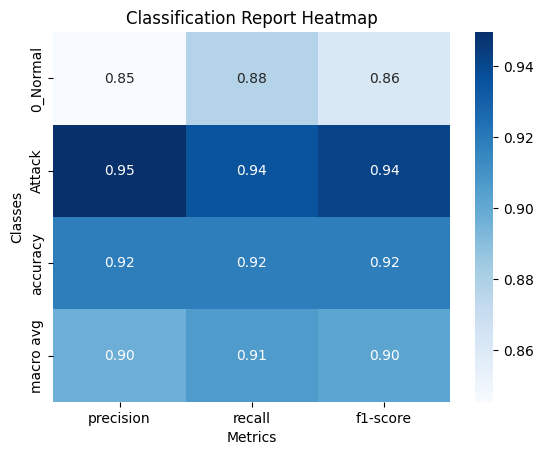


Confusion Matrix:


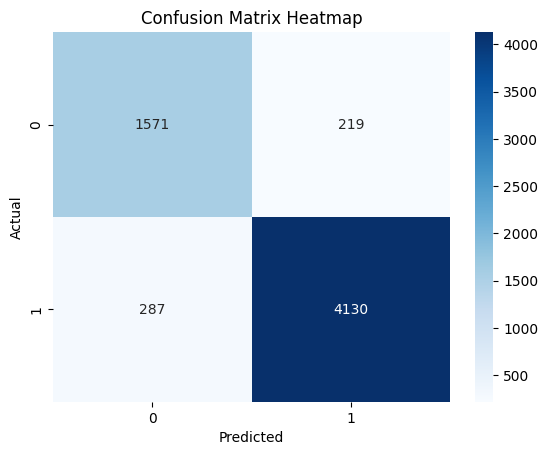

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 🔹 Ensure `final_model` is trained and valid before predicting
if final_model is not None:
    # 🔹 Get model predictions
    y_prob = final_model.predict(X_test)  # Probabilities
    y_pred = (y_prob > 0.5).astype(int).flatten()  # Convert to binary labels

    # 🔹 Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Decode the predictions and true labels to attack types
    decoded_y_test = le.inverse_transform(y_test)
    decoded_y_pred = le.inverse_transform(y_pred)
    # 🔹 Classification Report with `zero_division=1`
    report = classification_report(decoded_y_test, decoded_y_pred, output_dict=True, zero_division=1)
    report_df = pd.DataFrame(report).transpose()
    print("\nClassification Report:")
    print(report_df)

    # 🔹 Classification Report Heatmap
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues", cbar=True)
    plt.title("Classification Report Heatmap")
    plt.ylabel("Classes")
    plt.xlabel("Metrics")
    plt.show()

    # 🔹 Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(decoded_y_test, decoded_y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix Heatmap")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
else:
    print("Error: Model training failed. `final_model` is None.")